In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization, ReLU, Add, MaxPool2D, GlobalAveragePooling2D

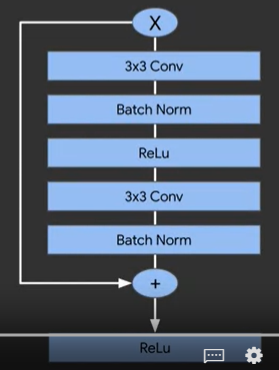

In [2]:
class IdentityBlock(Model):
  def __init__(self, filters, kernel_size):
    super(IdentityBlock, self).__init__(name = '')
    self.inner1 = Conv2D(filters = filters, kernel_size = kernel_size, padding = 'same')
    self.norm1 = BatchNormalization()
    self.relu = ReLU()
    self.add = Add()
    self.inner2 = Conv2D(filters = filters, kernel_size = kernel_size, padding = 'same')
    self.norm2 = BatchNormalization()
  def call(self, inputs):
    x = self.inner1(inputs)
    x = self.norm1(x)
    x = self.relu(x)
    x = self.inner2(x)
    x = self.norm2(x)
    x = self.add([x, inputs])
    return self.relu(x)


In [3]:
class ResNet(Model):
  def __init__(self, num_classes):
    super(ResNet, self).__init__()
    self.conv = Conv2D(filters = 64, kernel_size = (7, 7), padding = 'same')
    self.norm = BatchNormalization()
    self.act = ReLU()
    self.pool = MaxPool2D(pool_size = (2, 2))
    self.res1 = IdentityBlock(64, 3)
    self.res2 = IdentityBlock(64, 3)
    self.avgpool = GlobalAveragePooling2D()
    self.indentifier = Dense(num_classes, activation = 'softmax')
  def call(self, inputs):
    x = self.conv(inputs)
    x = self.norm(x)
    x = self.act(x)
    x = self.pool(x)
    x = self.res1(x)
    x = self.res2(x)
    x = self.avgpool(x)
    return self.indentifier(x)

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.expand_dims(x_train / 255.0, 3), np.expand_dims(x_test / 255.0, 3)
resnet = ResNet(10)
resnet.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [6]:
resnet.fit(x_train, y_train, validation_split=0.1, epochs = 5)

Epoch 1/5
1688/1688 [==============================] - 18s 6ms/step - loss: 0.1643 - accuracy: 0.9586 - val_loss: 0.6027 - val_accuracy: 0.7923
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0567 - accuracy: 0.9831 - val_loss: 0.0744 - val_accuracy: 0.9792
Epoch 3/5
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.2980 - val_accuracy: 0.9030
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.1125 - val_accuracy: 0.9688
Epoch 5/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0613 - val_accuracy: 0.9813


In [8]:
resnet.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9838


[0.056216247379779816, 0.9837999939918518]